# Perceptron multicamadas -MLP com Keras
Prof. Fernando Amaral

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import math

In [9]:
df = pd.read_csv('../../Dados/AirPassengers.csv', sep=',', parse_dates=True, index_col=0)
data = df.values
np.random.seed(3)

In [10]:
data = data.astype('float32')

In [11]:
train = data[0:125, :]
test = data[125:, :]

In [12]:
def prepare_data(data, lags=1):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)

In [13]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test

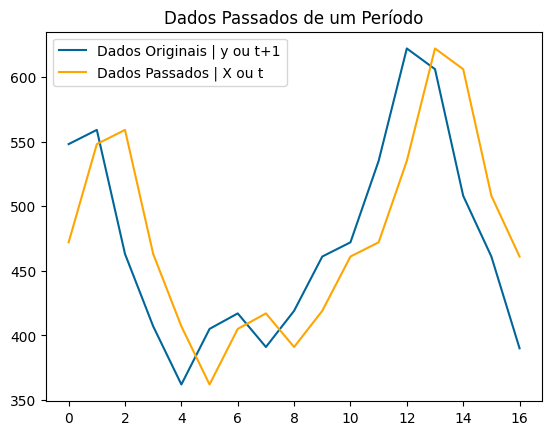

In [14]:
plt.plot(y_test, label='Dados Originais | y ou t+1', color='#006699')
plt.plot(X_test, label='Dados Passados | X ou t', color='orange')
plt.legend(loc='upper left')
plt.title('Dados Passados de um Período')
plt.show()

In [15]:
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
62/62 - 1s - loss: 75582.4297 - 672ms/epoch - 11ms/step
Epoch 2/200
62/62 - 0s - loss: 72190.7656 - 89ms/epoch - 1ms/step
Epoch 3/200
62/62 - 0s - loss: 72161.0625 - 100ms/epoch - 2ms/step
Epoch 4/200
62/62 - 0s - loss: 72131.3203 - 83ms/epoch - 1ms/step
Epoch 5/200
62/62 - 0s - loss: 72101.4062 - 91ms/epoch - 1ms/step
Epoch 6/200
62/62 - 0s - loss: 72071.4922 - 174ms/epoch - 3ms/step
Epoch 7/200
62/62 - 0s - loss: 72041.4141 - 116ms/epoch - 2ms/step
Epoch 8/200
62/62 - 0s - loss: 72011.4609 - 72ms/epoch - 1ms/step
Epoch 9/200
62/62 - 0s - loss: 71981.6172 - 76ms/epoch - 1ms/step
Epoch 10/200
62/62 - 0s - loss: 71951.6172 - 75ms/epoch - 1ms/step
Epoch 11/200
62/62 - 0s - loss: 71921.5625 - 71ms/epoch - 1ms/step
Epoch 12/200
62/62 - 0s - loss: 71891.5391 - 74ms/epoch - 1ms/step
Epoch 13/200
62/62 - 0s - loss: 71861.5625 - 67ms/epoch - 1ms/step
Epoch 14/200
62/62 - 0s - loss: 71831.5547 - 69ms/epoch - 1ms/step
Epoch 15/200
62/62 - 0s - loss: 71801.5625 - 65ms/epoch - 1ms/step

In [16]:
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Pontuação de Treino: 66390.22 MSE (257.66 RMSE)
Pontuação de teste: 217629.86 MSE (466.51 RMSE)


In [17]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [18]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

In [19]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

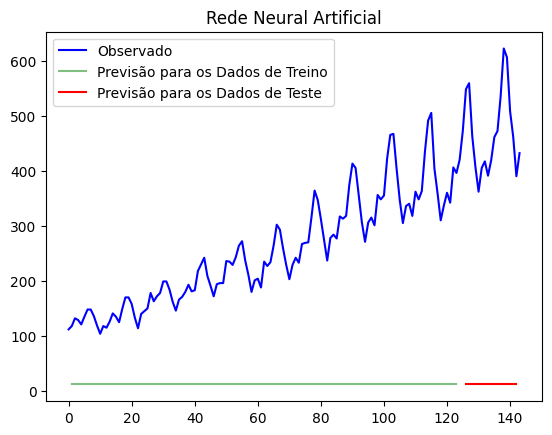

In [20]:
plt.plot(data, label='Observado', color='blue');
plt.plot(train_predict_plot, label='Previsão para os Dados de Treino', color='green', alpha=0.5);
plt.plot(test_predict_plot, label='Previsão para os Dados de Teste', color='red');
plt.legend(loc='best');
plt.title('Rede Neural Artificial')
plt.show()